# Image classification

## Data Collection

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-11 04:13:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  50.9MB/s    in 1.3s    

2020-07-11 04:13:06 (50.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Main Folder

*   Train -- cats and dogs

*   validation -- cats and dogs




In [3]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [4]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [5]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['cats', 'dogs']

In [6]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))

1000
1000


In [7]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [8]:
## File names
train_cat_filenames = os.listdir(train_cat_dir )
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

In [9]:
os.listdir()

['.config', 'sample_data']

## Display sample Images 

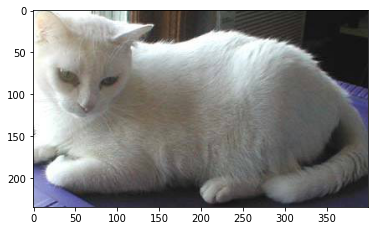

In [10]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

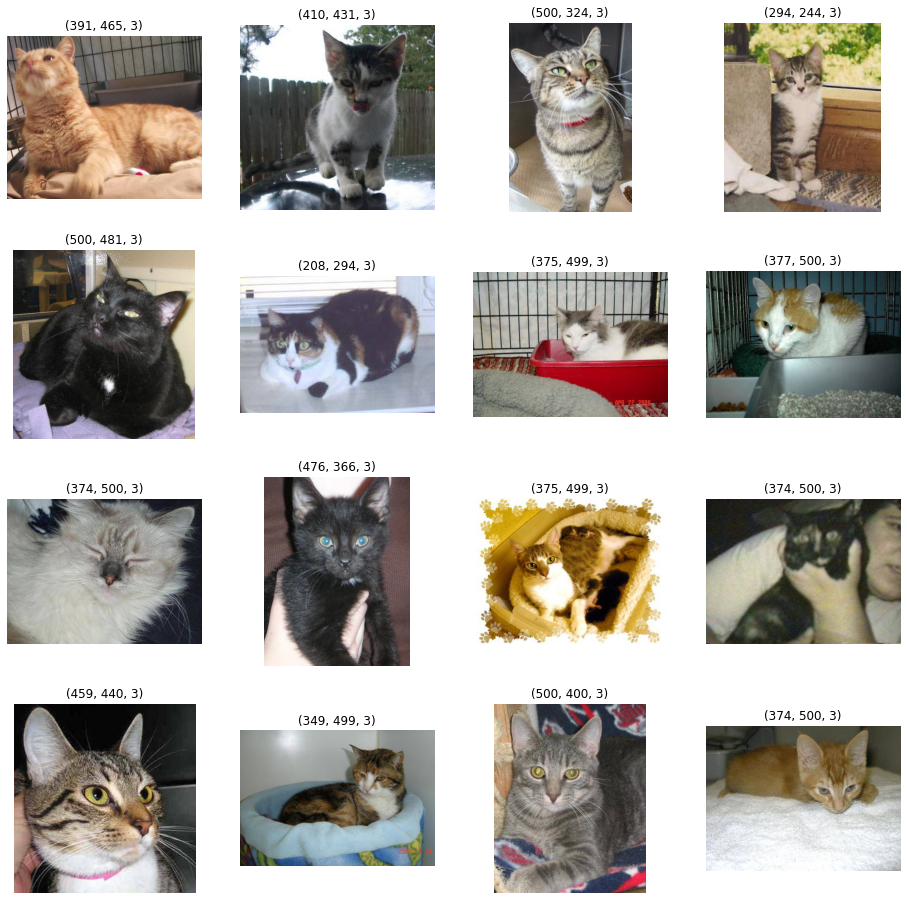

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j = 1  ## plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1


## Data Preprocessing 
Read the image data<br>
We have different shapes here.<br>
We need same shape for each image<br>
reshaing the images<br>
cats and dogs labelling<br>


## Creating Train and valiadtion data from Folder

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
train_generator

(20, 150, 150, 3)
(20,)


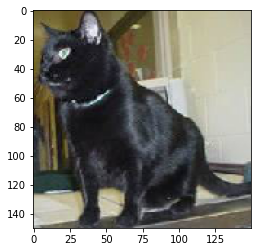

In [14]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

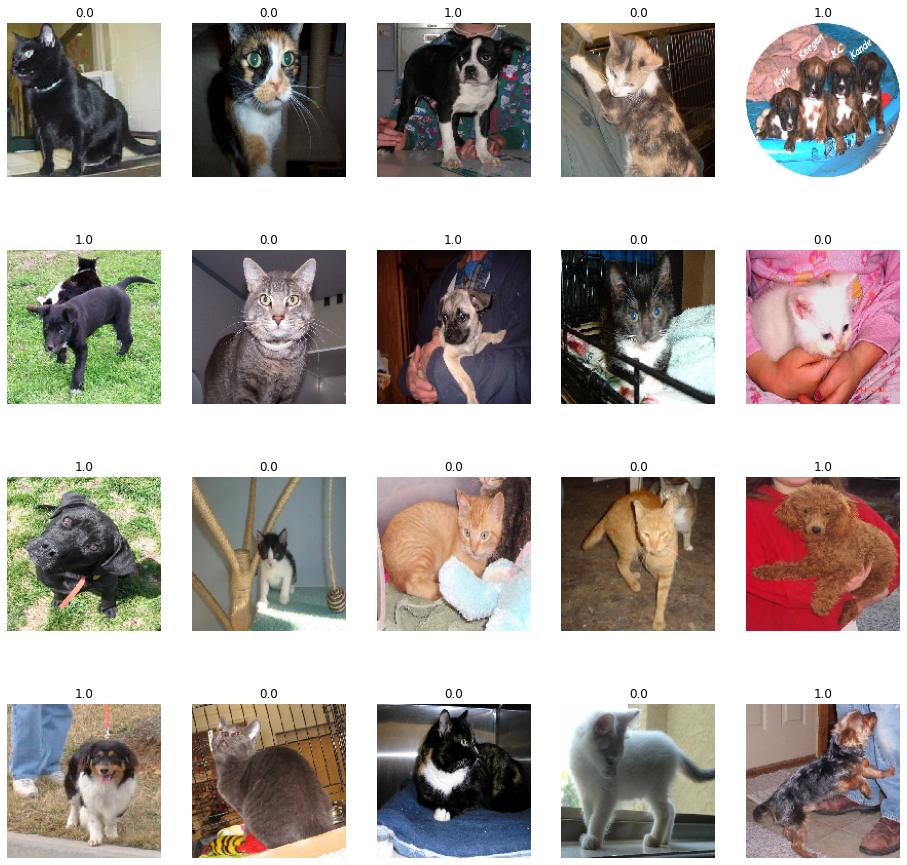

In [15]:
plt.figure(figsize=(16,16))
pos =1 # plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])
  plt.title(labels[i])
  plt.axis('off')
  pos += 1

### build the model

In [17]:
## import reqired methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
model = Sequential()
# add a conv layer followed by maxpooling
